## Example

https://diagrams.mingrammer.com/docs/getting-started/examples

## Clustered Web Services

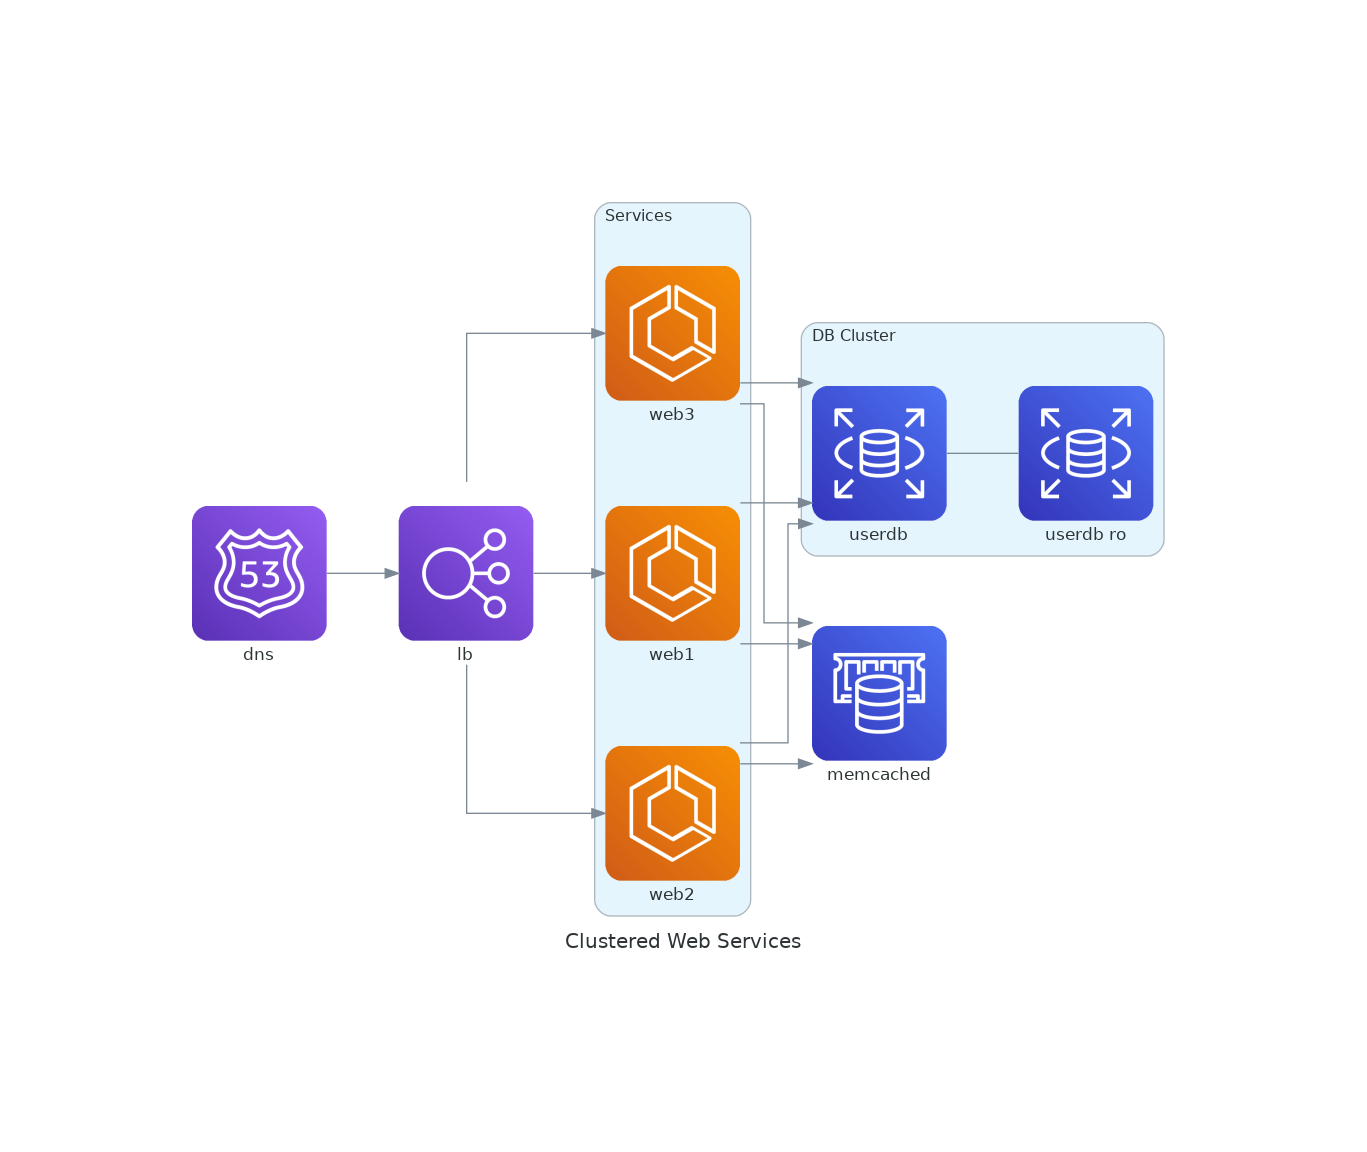

In [6]:
from diagrams import Cluster, Diagram
from diagrams.aws.compute import ECS
from diagrams.aws.database import ElastiCache, RDS
from diagrams.aws.network import ELB, Route53

with Diagram("Clustered Web Services", filename="diagrams/clustered-web-services", outformat="png", show=False) as diagram:
    dns = Route53("dns")
    lb = ELB("lb")

    with Cluster("Services"):
        svc_group = [ECS("web1"), ECS("web2"), ECS("web3")]

    with Cluster("DB Cluster"):
        db_master = RDS("userdb")
        db_master - [RDS("userdb ro")]

    memcached = ElastiCache("memcached")

    dns >> lb >> svc_group
    svc_group >> db_master
    svc_group >> memcached

diagram

## Digdag ECS

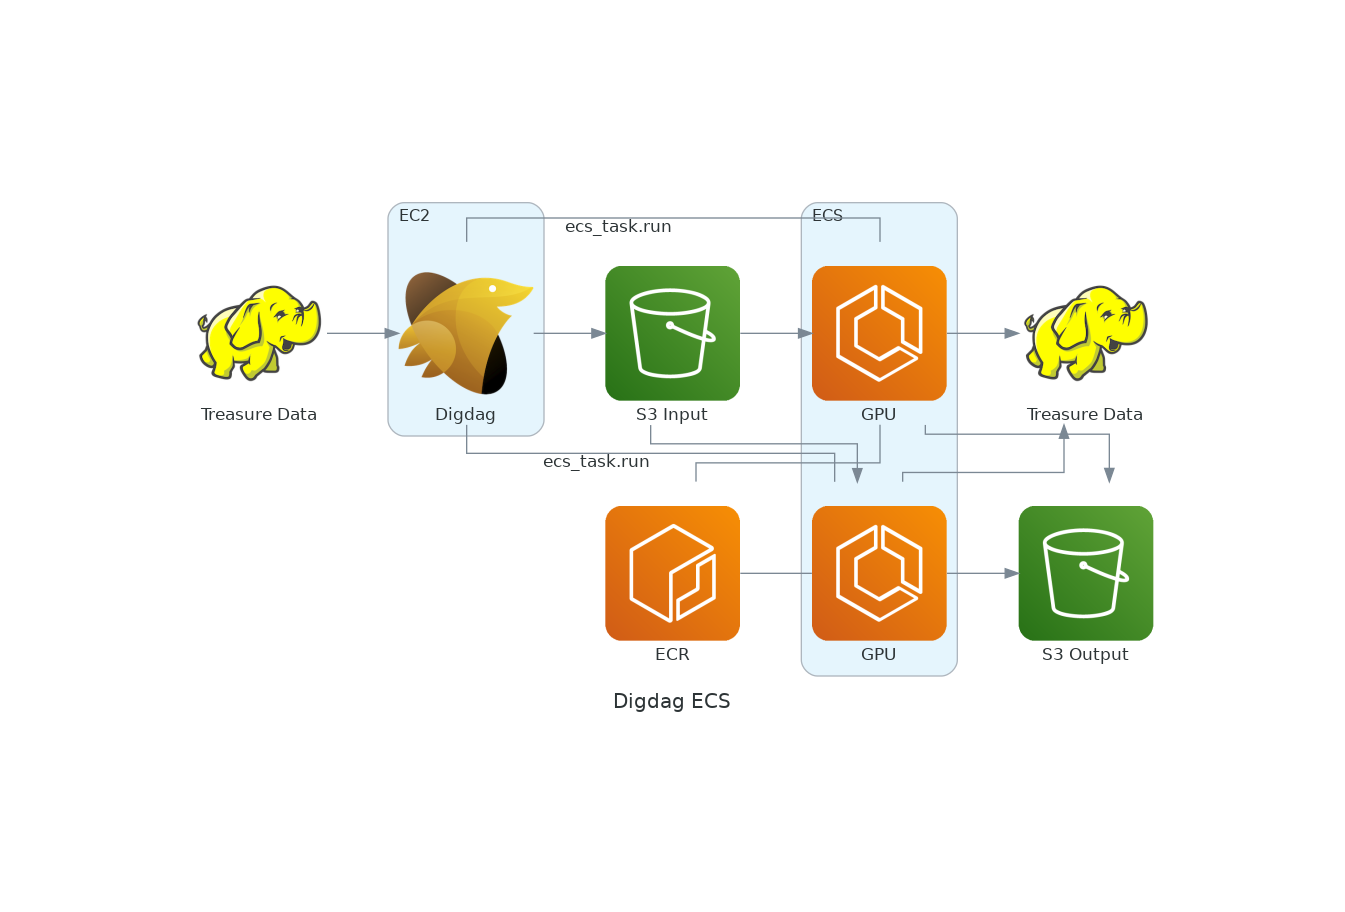

In [52]:
from diagrams import Cluster, Diagram, Edge
from diagrams.aws.compute import EC2, ECS
from diagrams.aws.compute import EC2ContainerRegistry as ECR
from diagrams.aws.storage import SimpleStorageServiceS3 as S3
from diagrams.onprem.analytics import Hadoop
from diagrams.onprem.workflow import Digdag

with Diagram("Digdag ECS", filename="diagrams/digdag-ecs", outformat="png", show=False, direction="LR") as diagram:
    td_input = Hadoop("Treasure Data")
    td_output = Hadoop("Treasure Data")

    s3_input = S3("S3 Input")
    s3_output = S3("S3 Output")

    ecr = ECR("ECR")

    with Cluster("EC2"):
        digdag = Digdag("Digdag")

    with Cluster("ECS"):
        #ecs = ECS("GPU")
        ecs = [ECS("GPU"), ECS("GPU")]

    # Arrow
    td_input >> digdag >> s3_input
    digdag - Edge(label="ecs_task.run") - ecs
    ecr - ecs
    s3_input >> ecs >> s3_output
    ecs >> td_output

diagram

## Digdag ETL

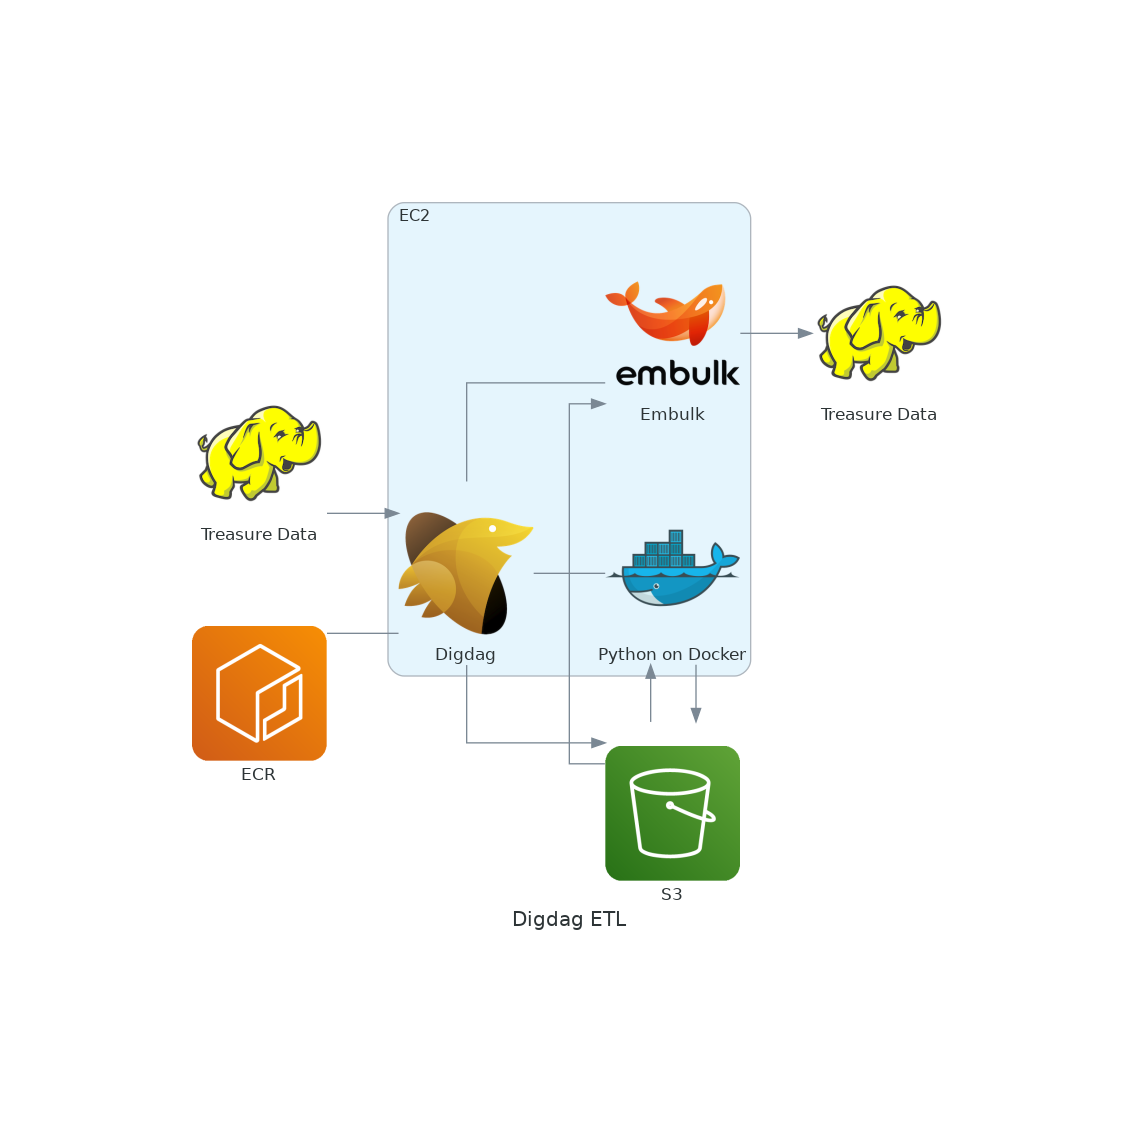

In [54]:
from diagrams import Cluster, Diagram, Edge
from diagrams.aws.compute import EC2
from diagrams.aws.compute import EC2ContainerRegistry as ECR
from diagrams.aws.storage import SimpleStorageServiceS3 as S3
from diagrams.onprem.analytics import Hadoop
from diagrams.onprem.container import Docker
from diagrams.onprem.etl  import Embulk
from diagrams.onprem.workflow import Digdag

with Diagram("Digdag ETL", filename="diagrams/digdag-etl", outformat="png", show=False, direction="LR") as diagram:
    td_input = Hadoop("Treasure Data")
    td_output = Hadoop("Treasure Data")

    s3 = S3("S3")

    ecr = ECR("ECR")

    with Cluster("EC2"):
        digdag = Digdag("Digdag")
        docker = Docker("Python on Docker")
        embulk = Embulk("Embulk")
        digdag - docker
        digdag - embulk

    # Arrow
    td_input >> digdag >> s3
    docker >> s3 >> docker
    s3 >> embulk >> td_output
    ecr - digdag

diagram